# PyNPEFA

PyNPEFA is a Python implementation of Integrated Prediction Error Filter Analysis (INPEFA) to show trend discontinuities in the data. This work is based on my BSc final project.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import lasio
import numpy as np
from PyNPEFA import PyNPEFA

Read LAS file by using lasio Python package.

In [2]:
y = lasio.read(".\\data\\1051308423.las").df().GR.dropna()
x = np.array(y.index.tolist())

Apply PyNPEFA on the data.

     pcost       dcost       gap    pres   dres
 0: -1.3453e+05 -5.5174e+04  2e+08  4e+03  9e-16
 1: -1.4730e+04 -4.0967e+04  1e+07  2e+02  4e-15
 2: -3.4420e+02 -3.9737e+04  2e+05  3e+00  4e-15
 3: -1.1245e+02 -2.3440e+04  2e+04  5e-16  2e-15
 4: -1.6615e+02 -3.8015e+03  4e+03  2e-16  1e-15
 5: -3.8188e+02 -9.1647e+02  5e+02  2e-16  4e-16
 6: -6.0974e+02 -6.9057e+02  8e+01  2e-16  3e-16
 7: -6.4675e+02 -6.6000e+02  1e+01  3e-16  3e-16
 8: -6.5293e+02 -6.5477e+02  2e+00  3e-16  3e-16
 9: -6.5384e+02 -6.5398e+02  1e-01  3e-16  3e-16
10: -6.5391e+02 -6.5392e+02  4e-03  2e-16  3e-16
11: -6.5392e+02 -6.5392e+02  8e-05  3e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3417e+05 -4.1224e+05  2e+08  4e+02  1e-15
 1: -1.4944e+04 -3.9935e+05  1e+07  2e+01  9e-15
 2: -9.7318e+02 -3.6814e+05  4e+05  2e-02  3e-15
 3: -1.3239e+03 -5.2080e+04  5e+04  3e-03  2e-15
 4: -2.9735e+03 -1.1112e+04  8e+03  3e-04  4e-16
 5: -5.1875e+03 -6.6559e+03  1e+03  5e-05  3e-1

C:\Users\edael\Anaconda3\lib\site-packages\spectrum\burg.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  E[m+1] = (1 - ref[m].conj().transpose()*ref[m]) * E[m]


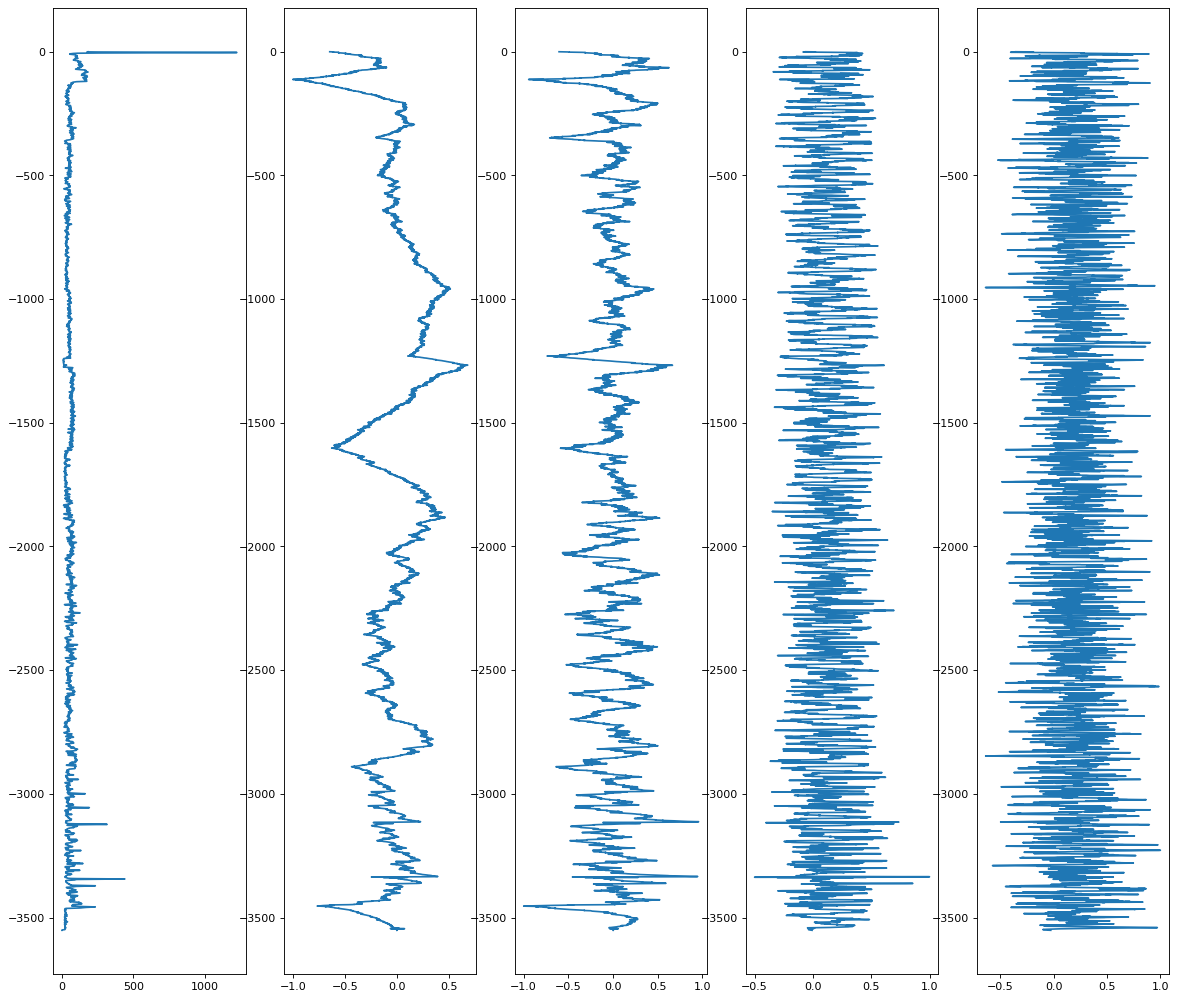

In [3]:
inpefa_log = PyNPEFA(y,x)

Plot the result.

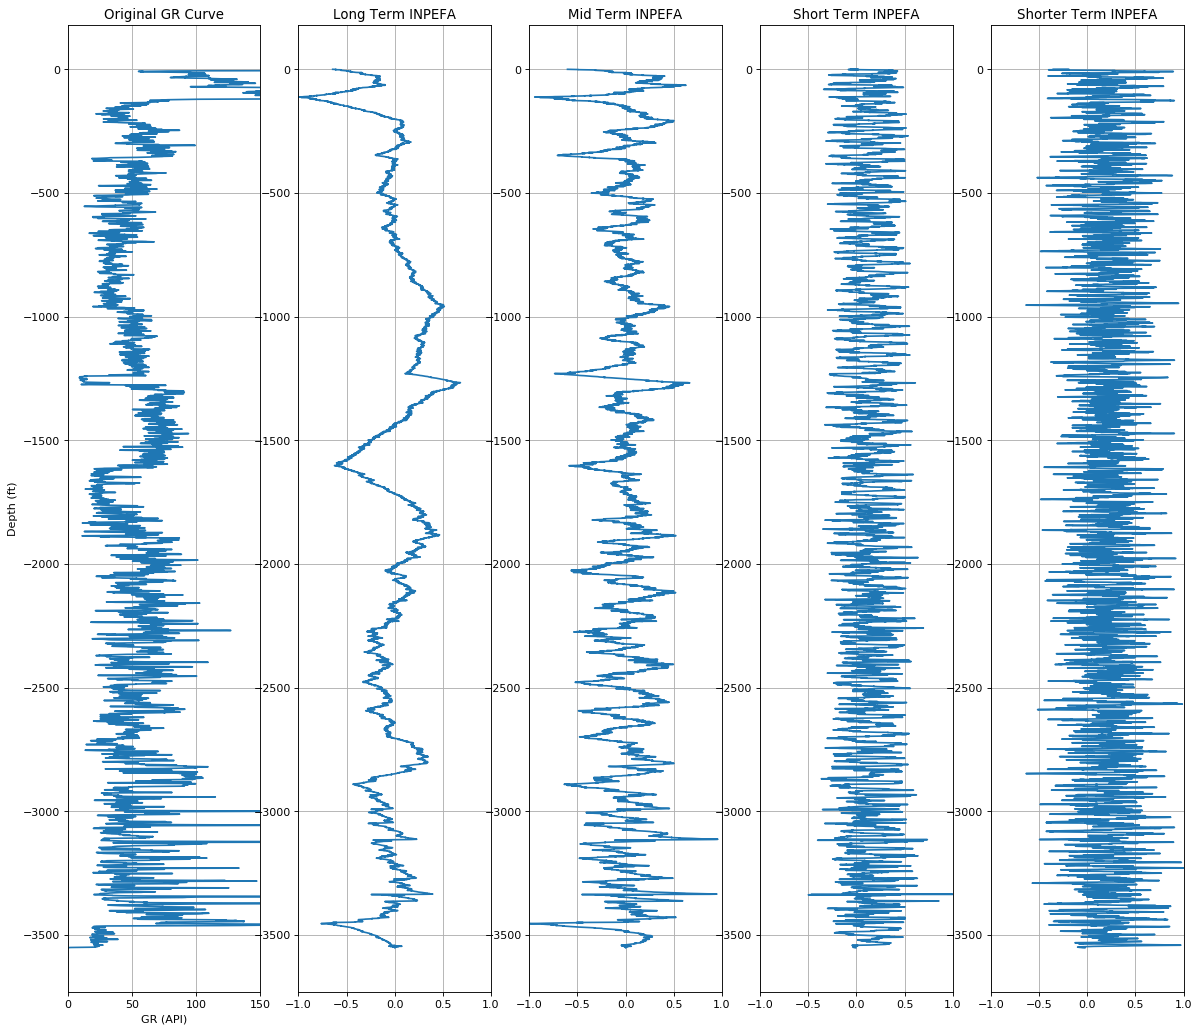

In [4]:
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(151)
plt.plot(inpefa_log['OG'],-x) # Original signal
plt.grid(True)
plt.xlabel('GR (API)')
plt.ylabel('Depth (ft)')
plt.xlim((0,150))
plt.title('Original GR Curve')

plt.subplot(152)
plt.plot(inpefa_log['1'],-x) # Long term INPEFA
plt.grid(True)
plt.xlim((-1,1))
plt.title('Long Term INPEFA')

plt.subplot(153)
plt.plot(inpefa_log['2'],-x) # Mid term INPEFA
plt.grid(True)
plt.xlim((-1,1))
plt.title('Mid Term INPEFA')

plt.subplot(154)
plt.plot(inpefa_log['3'],-x) # Short term INPEFA
plt.grid(True)
plt.xlim((-1,1))
plt.title('Short Term INPEFA')

plt.subplot(155)
plt.plot(inpefa_log['4'],-x) # Shorter term INPEFA
plt.grid(True)
plt.xlim((-1,1))
plt.title('Shorter Term INPEFA')

plt.show()

Save result to CSV file.

In [5]:
import pandas as pd

inpefa_log['Depth'] = x
a = pd.DataFrame.from_dict(inpefa_log).to_csv('.\\result\\PyNPEFA.csv',columns=['Depth','OG','1','2','3','4'],index=False)